In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.util import random_noise
import seaborn as sns
import os
import cv2
import random
import mnist_reader
import autoencoder
import tensorflow as tf

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train = []
test = []
#Pullover has index 2
for i in range(0, len(train_labels)):
    if (train_labels[i] == 2):
        train.append(train_images[i])
        
for i in range(0, len(test_labels)):
    if (test_labels[i] == 2):
        test.append(test_images[i])
        
print("Train size: ", len(train))
print("Test size: ", len(test))

Train size:  6000
Test size:  1000


In [7]:
#from PIL import Image 
from skimage.transform import resize
images_in=[]
images_out=[]
random.seed(564513)

for img in train:
    image = resize(img, (28, 28, 1))
    #image = plt.imread(img)
    images_out.append(image)
    seed = random.randint(1, 10000000)
    noisy = random_noise(image, mode='poisson', seed=seed)
    images_in.append(noisy)

images_in=np.asarray(images_in)
images_out=np.asarray(images_out)
X=images_in
y=images_out
print("Input images: ",X.shape)
print("Output images: ",y.shape)

Input images:  (6000, 28, 28, 1)
Output images:  (6000, 28, 28, 1)


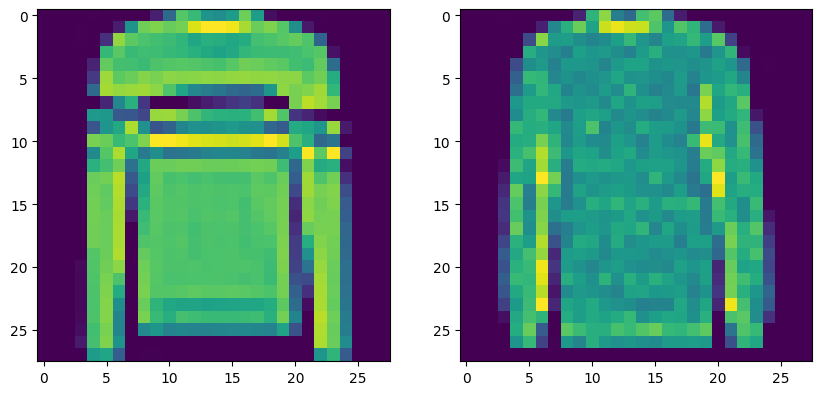

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(y[0])
plt.subplot(1, 2, 2)
plt.imshow(X[4])

In [9]:
X = X.astype('float32') / 255
y = y.astype('float32') / 255

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16)

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (5040, 28, 28, 1)
y_train shape :  (5040, 28, 28, 1)
X_test shape :  (960, 28, 28, 1)
y_test shape :  (960, 28, 28, 1)


In [11]:
encoder = autoencoder.get_model()

# training
batch_size = 8
epochs = 20
encoder.compile(optimizer='adam', loss='binary_crossentropy')
history = encoder.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Train on 5040 samples, validate on 960 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
5040/5040 [==============================] - 6s 1ms/sample - loss: 0.2795 - val_loss: 0.0869
Epoch 2/20
5040/5040 [==============================] - 6s 1ms/sample - loss: 0.0858 - val_loss: 0.0861
Epoch 3/20
5040/5040 [==============================] - 6s 1ms/sample - loss: 0.0853 - val_loss: 0.0856
Epoch 4/20
5040/5040 [==============================] - 7s 1ms/sample - loss: 0.0850 - val_loss: 0.0853
Epoch 5/20
5040/5040 [==============================] - 6s 1ms/sample - loss: 0.0848 - val_loss: 0.0851
Epoch 6/20
5040/5040 [==============================] - 5s 1ms/sample - loss: 0.0845 - val_loss: 0.0848
Epoch 7/20
5040/5040 [==============================] - 6s 1ms/sample - loss: 0.0842 - val_loss: 0.0846
Epoch 8/20
5040/5040 [==============================] - 5s 1ms/sample - loss: 0.0841 - val_loss: 0.0845
E

In [13]:
encoder.save('model.h5')

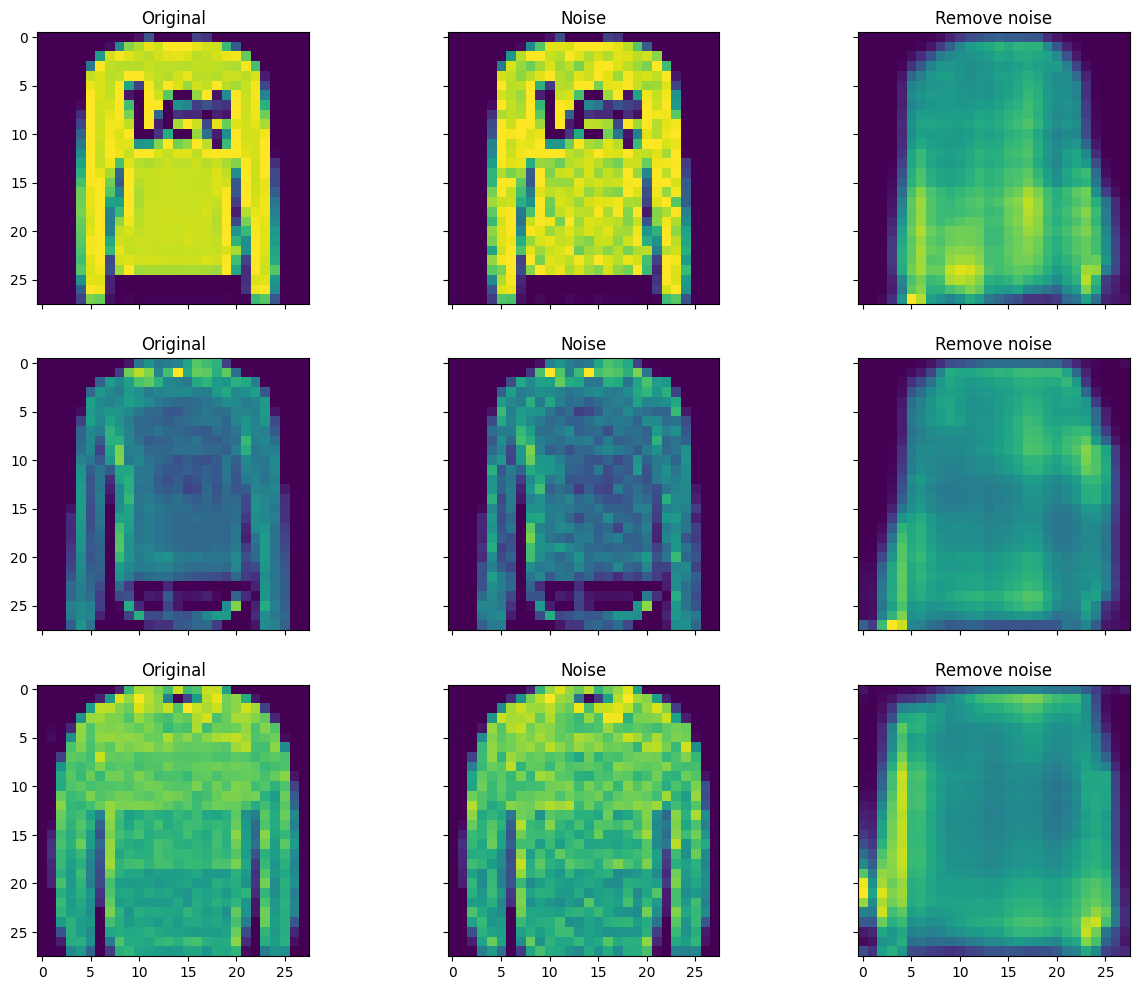

In [14]:
nrows = 3
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=(15, 12))

row = 0
for img in test:
    if (row == nrows):
        break
    
    img = resize(img, (28, 28, 1))
    ax[row,0].imshow(img)
    ax[row,0].set_title('Original')
    
    seed = random.randint(1, 10000000)
    noisy = random_noise(img, mode='poisson', seed=seed)
    ax[row,1].imshow(noisy)
    ax[row,1].set_title('Noise')
    
    data = []
    data.append(img)
    data = np.asarray(data)
    predict = encoder.predict(data)
    ax[row,2].imshow(predict[0])
    ax[row,2].set_title('Remove noise')
    
    row += 1
    